In [1]:
import json

from GEE_Processor import gee_processor
from Fire_Detector import fire_detector

In [2]:
# 1 Load the configuration file.
with open('input.json', 'r') as f:
    config = json.load(f)

In [3]:
# 2 Pre-process and download the NDVI time series data from GEE

# Get the selected remote sensing data
processor = gee_processor(
    study_area_shp_path=config['gee_processor']['study_area_shp_path'],
    start_date=config['gee_processor']['start_date'],
    end_date=config['gee_processor']['end_date'],
    land_cover_data=config['gee_processor']['land_cover_data'],
    remote_sensing_data=config['gee_processor']['remote_sensing_data']
)

# Get the NDVI stack
NDVI_stack = processor.NDVI_Exract_Stack()

# Export the NDVI stack
band_names = processor.export_image(
    NDVI_stack,
    filename=config['export_image']['image_path'],
    filename_band_name=config['export_image']['image_band_name'],
    scale=config['export_image']['scale'],
    crs=config['export_image']['crs'],
    unmask_value=config['export_image']['unmask_value']
)

# Visualize the study area and the NDVI stack
processor.geemap_export(NDVI_stack,config['export_image']['geemap_html'])


Google Earth Engine has initialized successfully!
Generating URL ...
Please wait ...
Data downloaded to c:\Users\li_sg\OneDrive - University of Twente\EMSITS\Fire_Detection_BEAST\MODIS_File\NDVI_stack.tif
Exporting MODIS_File/NDVI_stack.tif to GeoTIFF...
Band names saved to MODIS_File/band_name.npy
Geemap saved to MODIS_File/Map.html.


In [ ]:
import geemap
Map = geemap.Map()
Map.addLayer(processor.study_area, {}, 'Study Area')
Map.addLayer(NDVI_stack, {}, 'NDVI Stack')
Map.centerObject(processor.study_area, 10)
Map

In [7]:
import io
import contextlib

# 创建一个字符串流对象
output = io.StringIO()

# 使用 contextlib.redirect_stdout 将输出重定向到字符串流对象
with contextlib.redirect_stdout(output):
    detector = fire_detector(
        file_path=config['export_image']['image_path'],
        file_band_names=config['export_image']['image_band_name'],
        crs=config['export_image']['crs'],
        unmask_value=config['export_image']['unmask_value'],
        nan_ratio_threshold=config['fire_detector']['nan_ratio_threshold'],
        BEAST_belief_threshold=config['fire_detector']['BEAST_belief_threshold'],
        result_directory=config['fire_detector']['result_directory']
    )
    #ts = detector.detect_fire()

In [5]:
import pickle

# with open('ts.pkl', 'wb') as f:
#     pickle.dump(ts, f)
# with open('d.pkl', 'wb') as f:
#     pickle.dump(detector, f)

In [8]:
with open('ts.pkl', 'rb') as f:
    ts = pickle.load(f)
# with open('d.pkl', 'wb') as f:
#     detector=pickle.load(f)

In [ ]:
detector.crs

Fire detection visualisation saved to Fire_Detection_Result/Fire_Detection_Result.png
Fire detection visualisation (by time) saved to Fire_Detection_Result/Fire_Time_Count_by_Half_Year.png
Result Raster image saved to Fire_Detection_Result/Fire_Detection_Result.tif
Confusion Matrix:
[[8336  232]
 [ 418 1134]]
Accuracy: 0.94
Precision: 0.83
Recall: 0.73
F1 Score: 0.78
Kappa Score: 0.74
Fire detection visualisation saved to Fire_Detection_Result//Validation_Result/validation_result.png


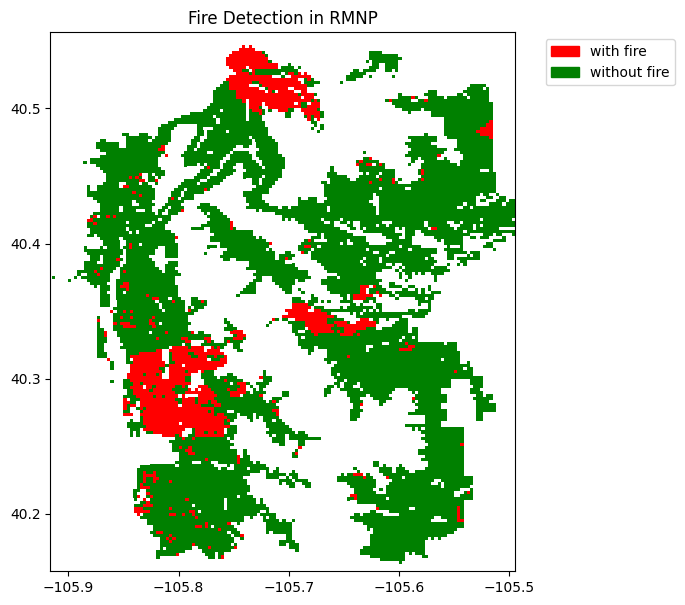

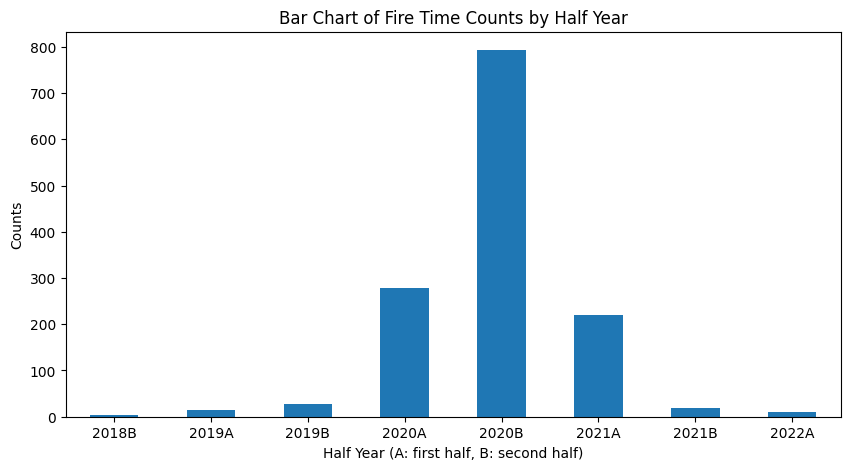

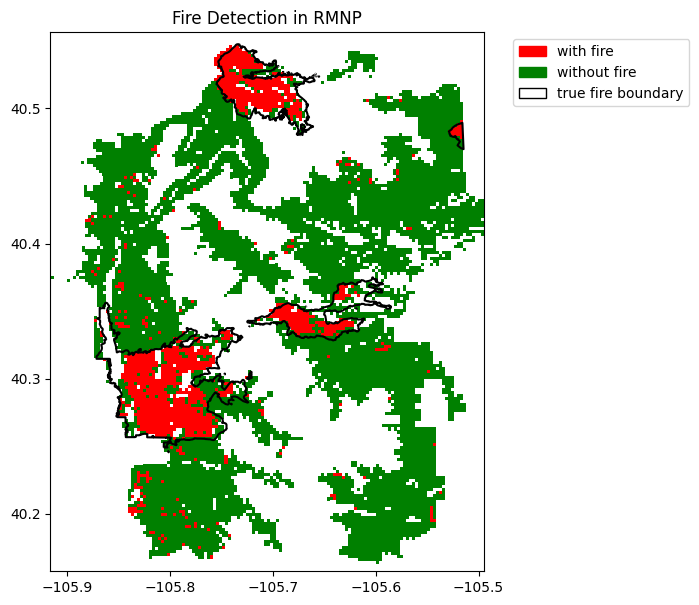

In [9]:
image = detector.fire_visualization(ts)
detector.fire_visualization_by_time(ts)
result_raster_path = detector.result_exported_as_raster(image)
validation_shp_path = config['fire_detector']['validation_shp_path']
detector.result_validation(result_raster_path,validation_shp_path)

In [ ]:
detector.transform

In [ ]:
import pyproj
import os
import sys
#os.environ['PROJ_LIB'] = os.path.dirname(sys.argv[0])
pyproj.datadir.get_data_dir()
pyproj.datadir.set_data_dir(os.path.dirname(sys.argv[0])) 
transformer = pyproj.Transformer.from_crs("EPSG:2232", 'EPSG:4326', always_xy=True)

In [ ]:
print(detector.crs)